### Autoencoders: A Detailed Overview

Autoencoders are a type of artificial neural network used for unsupervised learning of efficient codings. The goal of an autoencoder is to learn a compressed representation (encoding) for a set of data, typically for the purpose of dimensionality reduction, data compression, or feature extraction.

#### 1. **Architecture of Autoencoders**
An autoencoder consists of two main parts:
- **Encoder**: This part compresses the input into a lower-dimensional space (latent space). The encoder learns to map input data \(X\) to a smaller representation \(Z\), where \(Z = f(X)\).
- **Decoder**: The decoder takes the compressed encoding and reconstructs the original data. Its goal is to generate \(X'\) that closely matches the original input \(X\), i.e., \(X' = g(Z)\).

Both the encoder and decoder are typically implemented using neural networks. The overall structure looks like this:

$$
X \rightarrow \text{Encoder} \rightarrow Z \rightarrow \text{Decoder} \rightarrow X'
$$

- **Input Layer**: The raw data, such as images, text, or other types of data.
- **Bottleneck Layer (Latent Space)**: This is the compressed representation, or encoding, of the input.
- **Output Layer**: The reconstructed version of the input data, ideally very close to the original.

#### 1.1 **Loss Function**
The loss function in autoencoders is designed to minimize the difference between the input \(X\) and the reconstructed output \(X'\). Typically, **mean squared error (MSE)** is used:

$$
\mathcal{L}(X, X') = \|X - X'\|^2
$$

#### 1.2 **Training Objective**
The network is trained to minimize the reconstruction error between the original input and its reconstruction by adjusting the encoder and decoder weights.

The ideal autoencoder model balances the following:
- Sensitive to the inputs enough to accurately build a reconstruction.
- Insensitive enough to the inputs that the model doesn't simply memorize or overfit the training data.

This trade-off forces the model to maintain only the variations in the data required to reconstruct the input without holding on to redundancies within the input. For most cases, this involves constructing a loss function where one term encourages our model to be sensitive to the inputs (ie. reconstruction loss $\mathcal{L}(X, X')$ ) and a second term discourages memorization/overfitting (ie. an added regularizer).

$$
\mathcal{L}(X, X') + regularizer
$$

---

#### 2. **Types of Autoencoders**

#### 2.1 **Vanilla or Undercomplete Autoencoders**
- The simplest form of autoencoders.
- The encoder compresses the input data, and the decoder reconstructs the data from the compressed form.
- It may suffer from overfitting since it can learn an identity function if the bottleneck is large enough.
- In this case, we don’t have an explicit regularization mechanism, but we ensure that the size of the bottleneck is always lower than the original input size to avoid overfitting. This type of configuration is typically used as a dimensionality reduction technique (more powerful than PCA since its also able to capture non-linearities in the data).

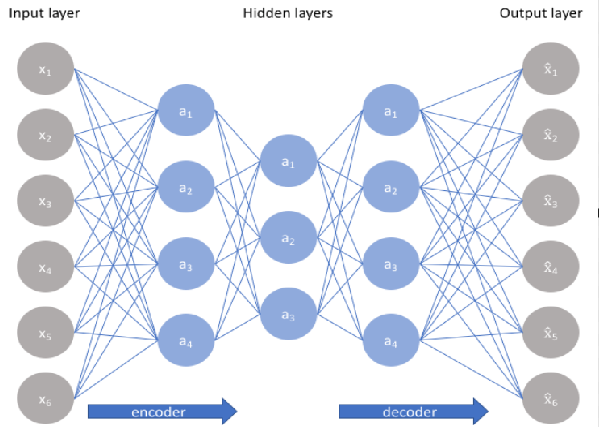

Because neural networks are capable of learning nonlinear relationships, this can be thought of as a more powerful (nonlinear) generalization of PCA. Whereas PCA attempts to discover a lower dimensional hyperplane which describes the original data, autoencoders are capable of learning nonlinear manifolds (a manifold is defined in simple terms as a continuous, non-intersecting surface).

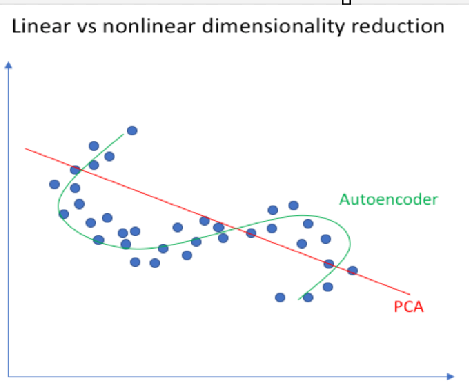

For higher dimensional data, autoencoders are capable of learning a complex representation of the data (manifold) which can be used to describe observations in a lower dimensionality and correspondingly decoded into the original input space.

An undercomplete autoencoder has no explicit regularization term - we simply train our model according to the reconstruction loss. Thus, our only way to ensure that the model isn't memorizing the input data is the ensure that we've sufficiently restricted the number of nodes in the hidden layer(s).

For deep autoencoders, we must also be aware of the capacity of our encoder and decoder models. Even if the "bottleneck layer" is only one hidden node, it's still possible for our model to memorize the training data provided that the encoder and decoder models have sufficient capability to learn some arbitrary function which can map the data to an index.

### 2.2 **Sparse Autoencoders**
Sparse autoencoders offer us an alternative method for introducing an information bottleneck without requiring a reduction in the number of nodes at our hidden layers. Rather, we'll construct our loss function such that we penalize activations within a layer. For any given observation, we'll encourage our network to learn an encoding and decoding which only relies on activating a small number of neurons. 

In fact, with Sparse Autoencoders, we don’t necessarily have to reduce the dimensions of the bottleneck, but we use a loss function that tries to penalize the model from using all its neurons in the different hidden layers. This penalty is commonly referred to as a sparsity function, and it's quite different from traditional regularization techniques since it doesn’t focus on penalizing the size of the weights but the number of nodes activated. 

There are two main ways by which we can impose this sparsity constraint; both involve measuring the hidden layer activations for each training batch and adding some term to the loss function in order to penalize excessive activations. 

- #### **L1 regularization**:  

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{reconstruction}} + \lambda \sum_j |h_j|
$$

where:
- $\mathcal{L}_{\text{reconstruction}}$ is the **reconstruction loss** (e.g., Mean Squared Error between the input and output).
- $\lambda$ is a hyperparameter controlling the strength of the sparsity constraint.
- $h_j$ represents the activation of the $j^{th}$ hidden neuron (i.e., the output of the hidden layer).
- $\sum_j |h_j|$ is the **L1 norm** of the activations, which penalizes large activations and encourages sparsity.

 **What is Happening Here?**

- **Reconstruction Loss**: Measures how well the network can reconstruct the input from the latent representation.
- **Sparsity Penalty**: The L1 norm of the hidden activations encourages most activations to be close to zero, making the latent space sparse. Only a few hidden neurons should activate strongly for any given input.

**Mathematics Behind L1 Sparsity on Activations**

When we apply the **L1 norm** to the activations of the hidden units, it works as follows:

**1. Hidden Layer Activation:**
Let the input to the hidden layer be $ \mathbf{x} $. The activations of the hidden neurons are given by:

$$
h_j = f(\mathbf{w}_j^T \mathbf{x} + b_j)
$$

Where:
- $ f $ is the activation function (e.g., ReLU, sigmoid).
- $ \mathbf{w}_j $ is the weight vector associated with the \(j\)-th hidden neuron.
- $ \mathbf{x} $ is the input.
- $ b_j $ is the bias term for the hidden neuron.

**2. L1 Regularization on Activations:**

The **L1 sparsity constraint** penalizes the sum of the absolute values of the activations $h_j$:

$$
\sum_j |h_j| = \sum_j |f(\mathbf{w}_j^T \mathbf{x} + b_j)|
$$

The regularization term encourages these activations to be sparse (i.e., close to zero).

**3. Total Loss Function:**

The total loss becomes the combination of reconstruction error and the L1 penalty on activations:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{reconstruction}} + \lambda \sum_j |h_j|
$$

The parameter $\lambda$ controls the trade-off between reconstructing the input accurately and enforcing sparsity on the hidden layer.

**Why Penalize Activations Instead of Weights?**

- **Penalizing weights** (as in standard L1 weight regularization) controls the size of the connections between neurons but does not directly ensure that the neurons themselves are inactive for most inputs.
- **Penalizing activations** ensures that the actual outputs of the hidden layer neurons are sparse, meaning most neurons will output values close to zero for a given input. This directly encourages sparsity in the learned representation.

Here’s an example of how you might implement L1 regularization on the activations in PyTorch:

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SparseAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SparseAutoencoder, self).__init__()
        # Encoder
        self.encoder = nn.Linear(input_dim, hidden_dim)
        # Decoder
        self.decoder = nn.Linear(hidden_dim, input_dim)
    
    def forward(self, x):
        # Encoder step
        z = torch.relu(self.encoder(x))
        # Decoder step
        x_recon = self.decoder(z)
        return x_recon, z

# Initialize the autoencoder
autoencoder = SparseAutoencoder(input_dim=784, hidden_dim=64)

# Define the optimizer
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Loss function (MSE loss)
mse_loss = nn.MSELoss()

# Sparsity regularization strength
lambda_l1 = 0.001

# Example forward pass with L1 activation penalty
for data in dataloader:
    # Forward pass
    x_recon, z = autoencoder(data)
    
    # Reconstruction loss (MSE)
    recon_loss = mse_loss(x_recon, data)
    
    # Sparsity loss (L1 regularization on the activations of the hidden layer)
    sparsity_loss = lambda_l1 * torch.sum(torch.abs(z))  # L1 regularization on activations
    
    # Total loss
    total_loss = recon_loss + sparsity_loss
    
    # Backpropagation and optimization
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()

- #### **KL divergence**
KL Divergence is a measure of how one probability distribution diverges from a second, expected probability distribution. If we have two probability distributions P and Q, the KL divergence from Q to P is given by: 
$$
D_{\text{KL}}(P \parallel Q) = \sum_i P(i) \log \left( \frac{P(i)}{Q(i)} \right)
$$
**Why Use KL Divergence in Sparse Autoencoders?**

In **sparse autoencoders**, the goal is to force most of the activations in the hidden layer to be **close to zero**, while allowing only a few neurons to be active. We can think of this sparsity constraint in probabilistic terms.

- **Desired Sparsity Level**: Let’s say we want each hidden neuron to be active (i.e., have a high activation) only a small percentage of the time, say $\rho$. This is called the **sparsity parameter**.
  
- **Average Activation**: Let’s denote the **average activation** of the $j$-th hidden neuron across all training examples as $ \hat{\rho}_j $ . The idea is to push this average activation $ \hat{\rho}_j $ towards the desired sparsity level $ \rho $.

This is where KL divergence comes in: we want the average activation $\hat{\rho}_j$ of each hidden unit to be **close** to the desired sparsity $ \rho $. The KL divergence is used to measure the difference between $ \hat{\rho}_j $ and $ \rho $, and it penalizes the network if the activations deviate too much from $ \rho $.

**KL Divergence as a Regularizer**

To enforce this sparsity constraint, we add a KL divergence penalty term to the autoencoder's loss function. The KL divergence between the desired activation $ \rho $ and the actual average activation $ \hat{\rho}_j $ for each hidden neuron $ j $ is:

$
D_{\text{KL}}(\rho \parallel \hat{\rho}_j) = \rho \log \left( \frac{\rho}{\hat{\rho}_j} \right) + (1 - \rho) \log \left( \frac{1 - \rho}{1 - \hat{\rho}_j} \right)
$

Where:
- $ \rho $ is the desired sparsity level (usually a small value, like 0.05).
- $ \hat{\rho}_j $ is the average activation of neuron $ j $ across all training examples.

**Total KL Divergence Regularization Term**

For all hidden neurons, we sum the KL divergence across all neurons in the hidden layer. So the total KL divergence regularization term is:

$$
\Omega = \sum_{j=1}^{n_h} D_{\text{KL}}(\rho \parallel \hat{\rho}_j)
$$

Where $ n_h $ is the number of hidden neurons.

**Complete Loss Function in Sparse Autoencoders**

The total loss function for a sparse autoencoder has two parts:

1. **Reconstruction Loss**: This measures how well the autoencoder can reconstruct the input. It could be mean squared error (MSE) or binary cross-entropy, depending on the task.
2. **KL Divergence Regularization**: This enforces the sparsity constraint by penalizing neurons whose average activations $ \hat{\rho}_j $ deviate from $ \rho $.

Thus, the total loss function is:

$$
\mathcal{L}_{\text{total}} = \mathcal{L}_{\text{reconstruction}} + \beta \sum_{j=1}^{n_h} D_{\text{KL}}(\rho \parallel \hat{\rho}_j)
$$

Where:
- $ \beta $ is a regularization parameter controlling the importance of the sparsity constraint.
- $ \mathcal{L}_{\text{reconstruction}} $ is the reconstruction loss.
- $ \sum_{j=1}^{n_h} D_{\text{KL}}(\rho \parallel \hat{\rho}_j) $ is the sparsity penalty for all hidden neurons.

**Mathematics Behind KL Divergence Penalization**

The KL divergence term $ D_{\text{KL}}(\rho \parallel \hat{\rho}_j) $ becomes small when the actual average activation $ \hat{\rho}_j $ is close to the desired sparsity $ \rho $.

- When $ \hat{\rho}_j \approx \rho $, the term $ D_{\text{KL}}(\rho \parallel \hat{\rho}_j) $ is small, and thus there is **no significant penalty**.
- However, if $ \hat{\rho}_j $ deviates significantly from $ \rho $ (i.e., if the hidden neuron is too frequently activated or too rarely activated), the penalty becomes large.

By minimizing this KL divergence term during training, the network is forced to keep the activations of hidden neurons close to the desired sparsity $ \rho $.

#### Explanation of KL divergence term for bernoulli distributions
A Bernoulli distribution is "the probability distribution of a random variable which takes the value 1 with probability p and the value 0 with probability 1-p". This corresponds quite well with establishing the probability a neuron will fire. Thus we can consider two bernoulli distributions, one represented by the random variable $\rho$ which is the desired distribution of the hidden layer neuron activations and the other represented by the random variable $ \hat{\rho}_j $ which is the actual distribution of hidden layer neuron activations.

Let us now see how do we arrive as the above formula for KL divergence as regularizer

**Bernoulli Distribution**

A Bernoulli distribution is a discrete probability distribution for a random variable that takes value 1 (success) with probability \( p \), and value 0 (failure) with probability \( 1 - p \). The probability mass function (PMF) of a Bernoulli distribution is:

$$
P(x) = 
\begin{cases} 
p & \text{if } x = 1 \\ 
1 - p & \text{if } x = 0 
\end{cases}
$$

Thus, a Bernoulli distribution is fully described by a single parameter $ p $, which represents the probability of success (outcome 1).

**KL Divergence for Bernoulli Distributions**

To compute the KL divergence between two Bernoulli distributions with parameters $ p $ and $ q $, the KL divergence formula becomes:

$$
D_{\text{KL}}(p \parallel q) = \sum_{x \in \{0, 1\}} P(x) \log \left( \frac{P(x)}{Q(x)} \right)
$$

For a Bernoulli distribution, the possible outcomes $ x $ are 0 and 1. Let’s break the sum into two parts: for $ x = 1 $ and $ x = 0 $.

**KL Divergence for $ x = 1 $**

For $ x = 1 $, the probability in $ P $ is $ p $, and the probability in $ Q $ is $ q $. So, we have:

$$
P(1) \log \left( \frac{P(1)}{Q(1)} \right) = p \log \left( \frac{p}{q} \right)
$$

**KL Divergence for $ x = 0 $**

For $ x = 0 $, the probability in $ P $ is $ 1 - p $, and the probability in $ Q $ is $ 1 - q $. So, we have:

$$
P(0) \log \left( \frac{P(0)}{Q(0)} \right) = (1 - p) \log \left( \frac{1 - p}{1 - q} \right)
$$

**Final Formula**

Adding the two components for $ x = 1 $ and $ x = 0 $, we get the final formula for the KL divergence between two Bernoulli distributions:

$
D_{\text{KL}}(p \parallel q) = p \log \left( \frac{p}{q} \right) + (1 - p) \log \left( \frac{1 - p}{1 - q} \right)
$

#### 2.3 **Denoising Autoencoders**
- These autoencoders are trained to reconstruct the input from a corrupted version of it. Noise is added to the input, and the model learns to recover the original data.
- The noise forces the encoder to learn more robust features and prevents the autoencoder from simply copying the input.
- For example, the model could be fed some low-resolution corrupted images and work for the output to improve the quality of the images. In order to assess the performance of the model and improve it over time, we would then need to have some form of labeled clean image to compare with the model prediction.
  
$$
X_{\text{noisy}} \rightarrow \text{Encoder} \rightarrow Z \rightarrow \text{Decoder} \rightarrow X'
$$

#### 2.4 **Variational Autoencoders (VAEs)**
- In every type of Autoencoder considered so far, the encoder outputs a single value for each dimension involved. With Variational Autoencoders (VAE), we make this process instead probabilistic, creating a probability distribution for each dimension. The decoder can then sample a value from each distribution describing the different dimensions and construct the input vector, which it can then be used to reconstruct the original input data. One of the main applications of Variational Autoencoders is for generative tasks. In fact, sampling the latent model from distributions can enable the decoder to create new forms of outputs that were previously not possible using a deterministic approach.
- VAEs are probabilistic models that learn not only to encode the data but also to model the distribution of the latent space.
- Instead of learning a fixed encoding, VAEs learn a distribution over possible encodings. They are often used in generative models.

$$
\mathcal{L}_{\text{VAE}} = \text{Reconstruction Loss} + \text{KL Divergence}
$$

#### 2.5 **Contractive Autoencoders**
- These impose a penalty on the **Jacobian matrix** of the encoder activations, enforcing the model to learn a more robust representation by minimizing the sensitivity of the encoded features with respect to small changes in the input data.

---


### 3. **Applications of Autoencoders**

#### 3.1 **Dimensionality Reduction**
Autoencoders can reduce the dimensionality of data, similar to **PCA (Principal Component Analysis)** but more powerful due to their non-linear capabilities.

#### 3.2 **Data Denoising**
Denoising autoencoders can remove noise from data, often used for tasks like image restoration or speech enhancement.

#### 3.3 **Anomaly Detection**
Autoencoders can be trained on normal data and used to detect anomalies. If the reconstruction error is high on a certain input, it is likely an anomaly.

#### 3.4 **Image Generation**
Variational autoencoders are widely used for generating images and other types of data by sampling from the learned latent space distribution.

---

### 4. **Limitations of Autoencoders**
- **Require labeled data for evaluation**: Although autoencoders are unsupervised, their evaluation is typically done on labeled datasets by comparing the reconstruction error.
- **Can be prone to overfitting**: If the latent space is large, the autoencoder may just learn to copy the input to the output without truly learning important features.
- **Sensitive to Hyperparameters**: The performance of an autoencoder is sensitive to the architecture (e.g., number of layers, size of the latent space) and other hyperparameters.